<a href="https://colab.research.google.com/github/Rajscientist/Data/blob/main/NLP_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk


In [ ]:
pip install svgling


In [ ]:
import svgling

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
nltk.download('maxent_ne_chunker')

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sentence = """I'm looking for cardiology doctor"""

In [ ]:
tokens = nltk.word_tokenize(sentence)


In [ ]:
tokens

['I', "'m", 'looking', 'for', 'cardiology', 'doctor']

In [ ]:
tagged = nltk.pos_tag(tokens)

In [ ]:
tagged

[('I', 'PRP'),
 ("'m", 'VBP'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('cardiology', 'NN'),
 ('doctor', 'NN')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)

NameError: name 'tagged' is not defined

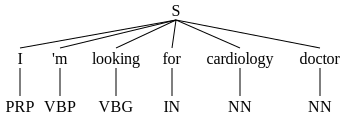

In [ ]:
entities

In [ ]:
import pickle
import subprocess
import sys
from nltk import Nonterminal, nonterminals, Production, CFG

In [ ]:
nt1 = Nonterminal('NP')
nt2 = Nonterminal('VP')

In [ ]:
nt1.symbol()

'NP'

In [ ]:
nt1 == Nonterminal('NP')

True

In [ ]:
nt1 == nt2

False

In [ ]:
S, NP, VP, PP = nonterminals('S, NP, VP, PP')
N, V, P, DT = nonterminals('N, V, P, DT')

In [ ]:
prod1 = Production(S, [NP, VP])
prod2 = Production(NP, [DT, NP])

In [ ]:
prod1.lhs()

S

In [ ]:
prod1.rhs()

(NP, VP)

In [ ]:
prod1 == Production(S, [NP, VP])

True

In [ ]:
prod1 == prod2

False

In [ ]:
grammar = CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> 'the' N | N PP | 'the' N PP
... VP -> V NP | V PP | V NP PP
... N -> 'cat'
... N -> 'dog'
... N -> 'rug'
... V -> 'chased'
... V -> 'sat'
... P -> 'in'
... P -> 'on' """)

In [ ]:
cmd = """import pickle
... from nltk import Production
... p = Production('S', ['NP', 'VP'])
... print(pickle.dumps(p))
... """

In [ ]:
# Start a subprocess to simulate pickling in another process
proc = subprocess.run([sys.executable, '-c', cmd], stdout=subprocess.PIPE)
p1 = pickle.loads(eval(proc.stdout))
p2 = Production('S', ['NP', 'VP'])
print(hash(p1) == hash(p2))

True


In [ ]:
from nltk.parse import RecursiveDescentParser
rd = RecursiveDescentParser(grammar)

In [ ]:
sentence1 = 'the cat chased the dog'.split()
sentence2 = 'the cat chased the dog on the rug'.split()

In [ ]:
for t in rd.parse(sentence1):
  print(t)

(S (NP the (N cat)) (VP (V chased) (NP the (N dog))))


In [ ]:
for s in rd.parse(sentence2):
  print(s)

(S
  (NP the (N cat))
  (VP (V chased) (NP the (N dog) (PP (P on) (NP the (N rug))))))
(S
  (NP the (N cat))
  (VP (V chased) (NP the (N dog)) (PP (P on) (NP the (N rug)))))


In [ ]:
from nltk.parse import ShiftReduceParser
sr = ShiftReduceParser(grammar)

In [ ]:
sentence1 = 'the cat chased the dog'.split()
sentence2 = 'the cat chased the dog on the rug'.split()

In [ ]:
for t in sr.parse(sentence1):
    print(t)

(S (NP the (N cat)) (VP (V chased) (NP the (N dog))))


In [ ]:
for t in sr.parse(sentence2):
    print(t)

In [ ]:
import nltk

In [ ]:
nltk.parse.chart.demo(2, print_times=False, trace=1,
                      sent='I saw a dog', numparses=1)

* Sentence:
I saw a dog
['I', 'saw', 'a', 'dog']

* Strategy: Bottom-up

|.    I    .   saw   .    a    .   dog   .|
|[---------]         .         .         .| [0:1] 'I'
|.         [---------]         .         .| [1:2] 'saw'
|.         .         [---------]         .| [2:3] 'a'
|.         .         .         [---------]| [3:4] 'dog'
|>         .         .         .         .| [0:0] NP -> * 'I'
|[---------]         .         .         .| [0:1] NP -> 'I' *
|>         .         .         .         .| [0:0] S  -> * NP VP
|>         .         .         .         .| [0:0] NP -> * NP PP
|[--------->         .         .         .| [0:1] S  -> NP * VP
|[--------->         .         .         .| [0:1] NP -> NP * PP
|.         >         .         .         .| [1:1] Verb -> * 'saw'
|.         [---------]         .         .| [1:2] Verb -> 'saw' *
|.         >         .         .         .| [1:1] VP -> * Verb NP
|.         >         .         .         .| [1:1] VP -> * Verb
|.         [--------->

In [ ]:
nltk.parse.chart.demo(1, print_times=False, trace=0,
                      sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Top-down

Nr edges in chart: 48
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))



In [ ]:
nltk.parse.chart.demo(2, print_times=False, trace=0,
                      sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Bottom-up

Nr edges in chart: 53
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))



In [ ]:
nltk.parse.chart.demo(3, print_times=False, trace=0,
                      sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

* Strategy: Bottom-up left-corner

Nr edges in chart: 36
(S
  (NP I)
  (VP (VP (Verb saw) (NP John)) (PP with (NP (Det a) (Noun dog)))))
(S
  (NP I)
  (VP (Verb saw) (NP (NP John) (PP with (NP (Det a) (Noun dog))))))



In [ ]:
nltk.parse.chart.demo(4, print_times=False, trace=3,
                      sent='I saw John with a dog', numparses=2)

In [ ]:
nltk.parse.chart.demo(5, print_times=False, trace=1,
                      sent='I saw John with a dog', numparses=2)

In [ ]:
nltk.parse.earleychart.demo(print_times=False, trace=1,
                            sent='I saw John with a dog', numparses=2)

* Sentence:
I saw John with a dog
['I', 'saw', 'John', 'with', 'a', 'dog']

|.  I   . saw  . John . with .  a   . dog  .|
|[------]      .      .      .      .      .| [0:1] 'I'
|.      [------]      .      .      .      .| [1:2] 'saw'
|.      .      [------]      .      .      .| [2:3] 'John'
|.      .      .      [------]      .      .| [3:4] 'with'
|.      .      .      .      [------]      .| [4:5] 'a'
|.      .      .      .      .      [------]| [5:6] 'dog'
|>      .      .      .      .      .      .| [0:0] S  -> * NP VP
|>      .      .      .      .      .      .| [0:0] NP -> * NP PP
|>      .      .      .      .      .      .| [0:0] NP -> * Det Noun
|>      .      .      .      .      .      .| [0:0] NP -> * 'I'
|[------]      .      .      .      .      .| [0:1] NP -> 'I' *
|[------>      .      .      .      .      .| [0:1] S  -> NP * VP
|[------>      .      .      .      .      .| [0:1] NP -> NP * PP
|.      >      .      .      .      .      .| [1:1] VP -> * VP PP
|.   

In [ ]:
grammar = nltk.data.load('grammars/large_grammars/atis.cfg')

In [ ]:
nltk.download('large_grammars')

[nltk_data] Downloading package large_grammars to /root/nltk_data...
[nltk_data]   Unzipping grammars/large_grammars.zip.


True

In [ ]:
grammar

<Grammar with 5517 productions>

In [ ]:
sentences = nltk.data.load('grammars/large_grammars/atis_sentences.txt')

In [ ]:
sentences = nltk.parse.util.extract_test_sentences(sentences)

In [ ]:
len(sentences)

98

In [ ]:
testsentence = sentences[22]

In [ ]:
testsentence[0]

['show', 'me', 'northwest', 'flights', 'to', 'detroit', '.']

In [ ]:
sentence = testsentence[0]

In [ ]:
parser = nltk.parse.BottomUpChartParser(grammar)

In [ ]:
chart = parser.chart_parse(sentence)

In [ ]:
print((chart.num_edges()))

7661


In [ ]:
print((len(list(chart.parses(grammar.start())))))

17


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
example_string = """
Muad'Dib learned rapidly because his first training was in how to learn.
And the first lesson of all was the basic trust that he could learn.
It's shocking to find how many people do not believe they can learn,
and how many more believe learning to be difficult."""


In [ ]:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [ ]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
worf_quote = "Sir, I protest. I am not a merry man!"

In [ ]:
words_in_quote = word_tokenize(worf_quote)

In [ ]:
words_in_quote

['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
stop_words

In [ ]:
filtered_list = []

In [ ]:
for word in words_in_quote:
  if word.casefold() not in stop_words:
    filtered_list.append(word)

In [ ]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

In [ ]:
filtered_list = [ word for word in words_in_quote if word.casefold() not in stop_words]

In [ ]:
filtered_list

['Sir', ',', 'protest', '.', 'merry', 'man', '!']

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer = PorterStemmer()

In [ ]:
string_for_stemming = """The crew of the USS Discovery discovered many discoveries. Discovering is what explorers do."""

In [ ]:
words = word_tokenize(string_for_stemming)

In [ ]:
words

['The',
 'crew',
 'of',
 'the',
 'USS',
 'Discovery',
 'discovered',
 'many',
 'discoveries',
 '.',
 'Discovering',
 'is',
 'what',
 'explorers',
 'do',
 '.']

In [ ]:
stemmed_words = [stemmer.stem(word) for word in words]

In [ ]:
stemmed_words

['the',
 'crew',
 'of',
 'the',
 'uss',
 'discoveri',
 'discov',
 'mani',
 'discoveri',
 '.',
 'discov',
 'is',
 'what',
 'explor',
 'do',
 '.']

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
sagan_quote = """
If you wish to make an apple pie from scratch, you must first invent the universe."""

In [ ]:
words_in_sagan_quote = word_tokenize(sagan_quote)

In [ ]:
words_in_sagan_quote

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
  nltk.pos_tag(words_in_sagan_quote)

[('If', 'IN'),
 ('you', 'PRP'),
 ('wish', 'VBP'),
 ('to', 'TO'),
 ('make', 'VB'),
 ('an', 'DT'),
 ('apple', 'NN'),
 ('pie', 'NN'),
 ('from', 'IN'),
 ('scratch', 'NN'),
 (',', ','),
 ('you', 'PRP'),
 ('must', 'MD'),
 ('first', 'VB'),
 ('invent', 'VB'),
 ('the', 'DT'),
 ('universe', 'NN'),
 ('.', '.')]

In [ ]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


True

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
jabberwocky_excerpt = """'Twas brillig, and the slithy toves did gyre and gimble in the wabe: all mimsy were the borogoves, and the mome raths outgrabe."""

In [ ]:
words_in_excerpt = word_tokenize(jabberwocky_excerpt)

In [ ]:
nltk.pos_tag(words_in_excerpt)

[("'T", 'NN'),
 ('was', 'VBD'),
 ('brillig', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('slithy', 'JJ'),
 ('toves', 'NNS'),
 ('did', 'VBD'),
 ('gyre', 'NN'),
 ('and', 'CC'),
 ('gimble', 'JJ'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('wabe', 'NN'),
 (':', ':'),
 ('all', 'DT'),
 ('mimsy', 'NNS'),
 ('were', 'VBD'),
 ('the', 'DT'),
 ('borogoves', 'NNS'),
 (',', ','),
 ('and', 'CC'),
 ('the', 'DT'),
 ('mome', 'JJ'),
 ('raths', 'NNS'),
 ('outgrabe', 'RB'),
 ('.', '.')]

In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [ ]:
entities = nltk.chunk.ne_chunk(nltk.pos_tag(words_in_excerpt))

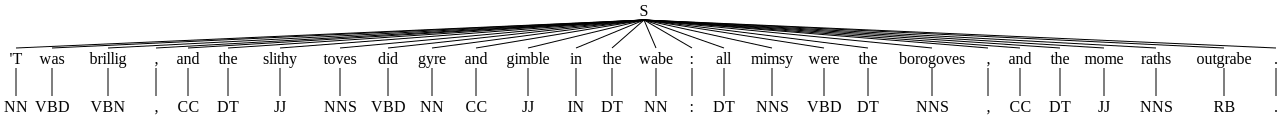

In [ ]:
entities

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer.lemmatize("scarves")

'scarf'

In [ ]:
string_for_lemmatizing = "The friends of DeSoto love scarves."

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
words = word_tokenize(string_for_lemmatizing)

In [ ]:
words

['The', 'friends', 'of', 'DeSoto', 'love', 'scarves', '.']

In [ ]:
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

In [ ]:
lemmatized_words

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']

In [ ]:
lemmatizer.lemmatize("worst")

'worst'

In [ ]:
lemmatizer.lemmatize("worst", pos="a")

'bad'